In [1]:
import torch
from transformers import ViTForImageClassification, AutoImageProcessor

from PIL import Image

c:\Users\davia\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Foi utilizado o seguinte modelo de classificação de alimentos:
- https://huggingface.co/nateraw/food

Que é baseado no [google/vit-base-patch16-224-in21k](https://huggingface.co/google/vit-base-patch16-224-in21k) e que sofreu um processo de fine tuning na base de imagens [food101](https://huggingface.co/datasets/food101). 

Abaixo está alguma das classes que modelo é capaz de classificar.

In [2]:
model = ViTForImageClassification.from_pretrained('nateraw/food')
model.config.id2label

{0: 'apple_pie',
 1: 'baby_back_ribs',
 10: 'bruschetta',
 100: 'waffles',
 11: 'caesar_salad',
 12: 'cannoli',
 13: 'caprese_salad',
 14: 'carrot_cake',
 15: 'ceviche',
 16: 'cheese_plate',
 17: 'cheesecake',
 18: 'chicken_curry',
 19: 'chicken_quesadilla',
 2: 'baklava',
 20: 'chicken_wings',
 21: 'chocolate_cake',
 22: 'chocolate_mousse',
 23: 'churros',
 24: 'clam_chowder',
 25: 'club_sandwich',
 26: 'crab_cakes',
 27: 'creme_brulee',
 28: 'croque_madame',
 29: 'cup_cakes',
 3: 'beef_carpaccio',
 30: 'deviled_eggs',
 31: 'donuts',
 32: 'dumplings',
 33: 'edamame',
 34: 'eggs_benedict',
 35: 'escargots',
 36: 'falafel',
 37: 'filet_mignon',
 38: 'fish_and_chips',
 39: 'foie_gras',
 4: 'beef_tartare',
 40: 'french_fries',
 41: 'french_onion_soup',
 42: 'french_toast',
 43: 'fried_calamari',
 44: 'fried_rice',
 45: 'frozen_yogurt',
 46: 'garlic_bread',
 47: 'gnocchi',
 48: 'greek_salad',
 49: 'grilled_cheese_sandwich',
 5: 'beet_salad',
 50: 'grilled_salmon',
 51: 'guacamole',
 52: 'g

Pegando um imagem de alimento, foi importada ela e feito o processamento da mesma para a utilização no modelo.

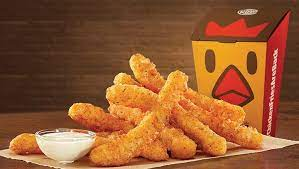

In [3]:
url = "images/chicken_fries.jpeg"
image = Image.open(url)
image

In [4]:
image_processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")

Tendo feito o processamento da imagem, foi feita a classificação de qual o provável alimento que o modelo acredita ser, pegando a classe com a maior probabilidade estimada.

In [5]:
inputs = image_processor(image, return_tensors="pt")
with torch.no_grad():
    logits = model(**inputs).logits

prob_predicted = torch.nn.functional.softmax(logits)
predicted_label = prob_predicted.argmax(-1).item()

print('Alimento predito:')
print(model.config.id2label[predicted_label])

Alimento predito:
fried_calamari


C:\Users\davia\AppData\Local\Temp\ipykernel_2612\4073042017.py:5: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  prob_predicted = torch.nn.functional.softmax(logits)
